In [3]:
# Get the best and default metric value

import numpy as np
import os, glob, sys, toml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from itertools import combinations
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize
import matplotlib.cm as cm


In [17]:

# iteration range (start from 0)
istart = 0
iend = 8

path0 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO'


metcomp = np.nan * np.zeros([627, 2])

for b in range(627):
    # load basin metrics
    df_met = pd.DataFrame()
    minobjfuncs = []
    emulator_metric = []
    for i in range(istart, iend + 1):
        # evaluation metric
        filemet = f'{path0}/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_all_metric.csv'
        dfi = pd.read_csv(filemet)
        dfi['iter'] = i

        df_met = pd.concat([df_met, dfi])

    metricmean = (df_met['metric1'].values+df_met['metric2'].values)/2
    metcomp[b, 0] = metricmean[0]
    metcomp[b, 1] = np.nanmin(metricmean)

        

In [23]:
print(np.sum(~np.isnan(metcomp),axis=0))
print(np.nanmean(metcomp,axis=0))
print(metcomp[97,:])

[627 627]
[9.2578507  5.44677208]
[2.97975123 2.47691811]


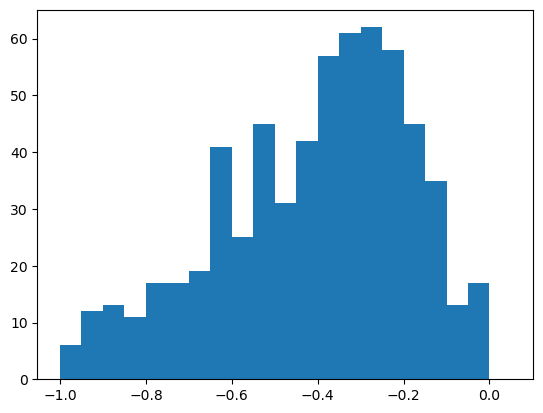

In [18]:
d2 = metcomp[:,1]
d1 = metcomp[:,0]
plt.hist( (d2-d1)/d1, np.arange(-1, 0.1, 0.05))
plt.show()